# Comparativo do consumo de energia per capita nos países: Brasil, China e Estados Unidos

Nesse projeto será abordada uma análise comparativa sobre o consumo per capita de energia entre o Brasil, China e Estados Unidos. O período analisado no comparativo da variação do consumo será de 1965 a 2019 e a análise comparativa do consumo em si será feita para os anos de 2010 a 2019.

Ao decorrer do arquivo serão feitas as seguintes execuções:
- Conhecendo o dataset disponível para o trabalho
    - Importação das bibliotecas que serão utilizadas no estudo
    - Análise exploratória dos dados fornecidos no dataset XXXXX
    - Interpretação e entendimento dos dados
    - Conclusão dessa primeira parte do projeto
    
- Análise e manipulação dos dados necessários para o comparativo
    - tradução para pt-br das estruturas originais
    - filtragem dos dados de acordo com as necessidades e interesses desse projeto, criando uma nova tabela de dados
    - Verificando se a nova tabela está de acordo com o necessário
    
- Salvando o novo dataset
    - Para fins de backup e de estudos futuros sobre os mesmos dados
    
- Criando a visualização dos dados
    - Gráfico de análise comparativa sobre crescimento do consumo de energia per capita nos países estudados durante o período 1965-2019
    - Gráfico de análise comparativa do consumo de energia per capita nos países estudados durante o período 2010-2019

- Conclusão do estudo

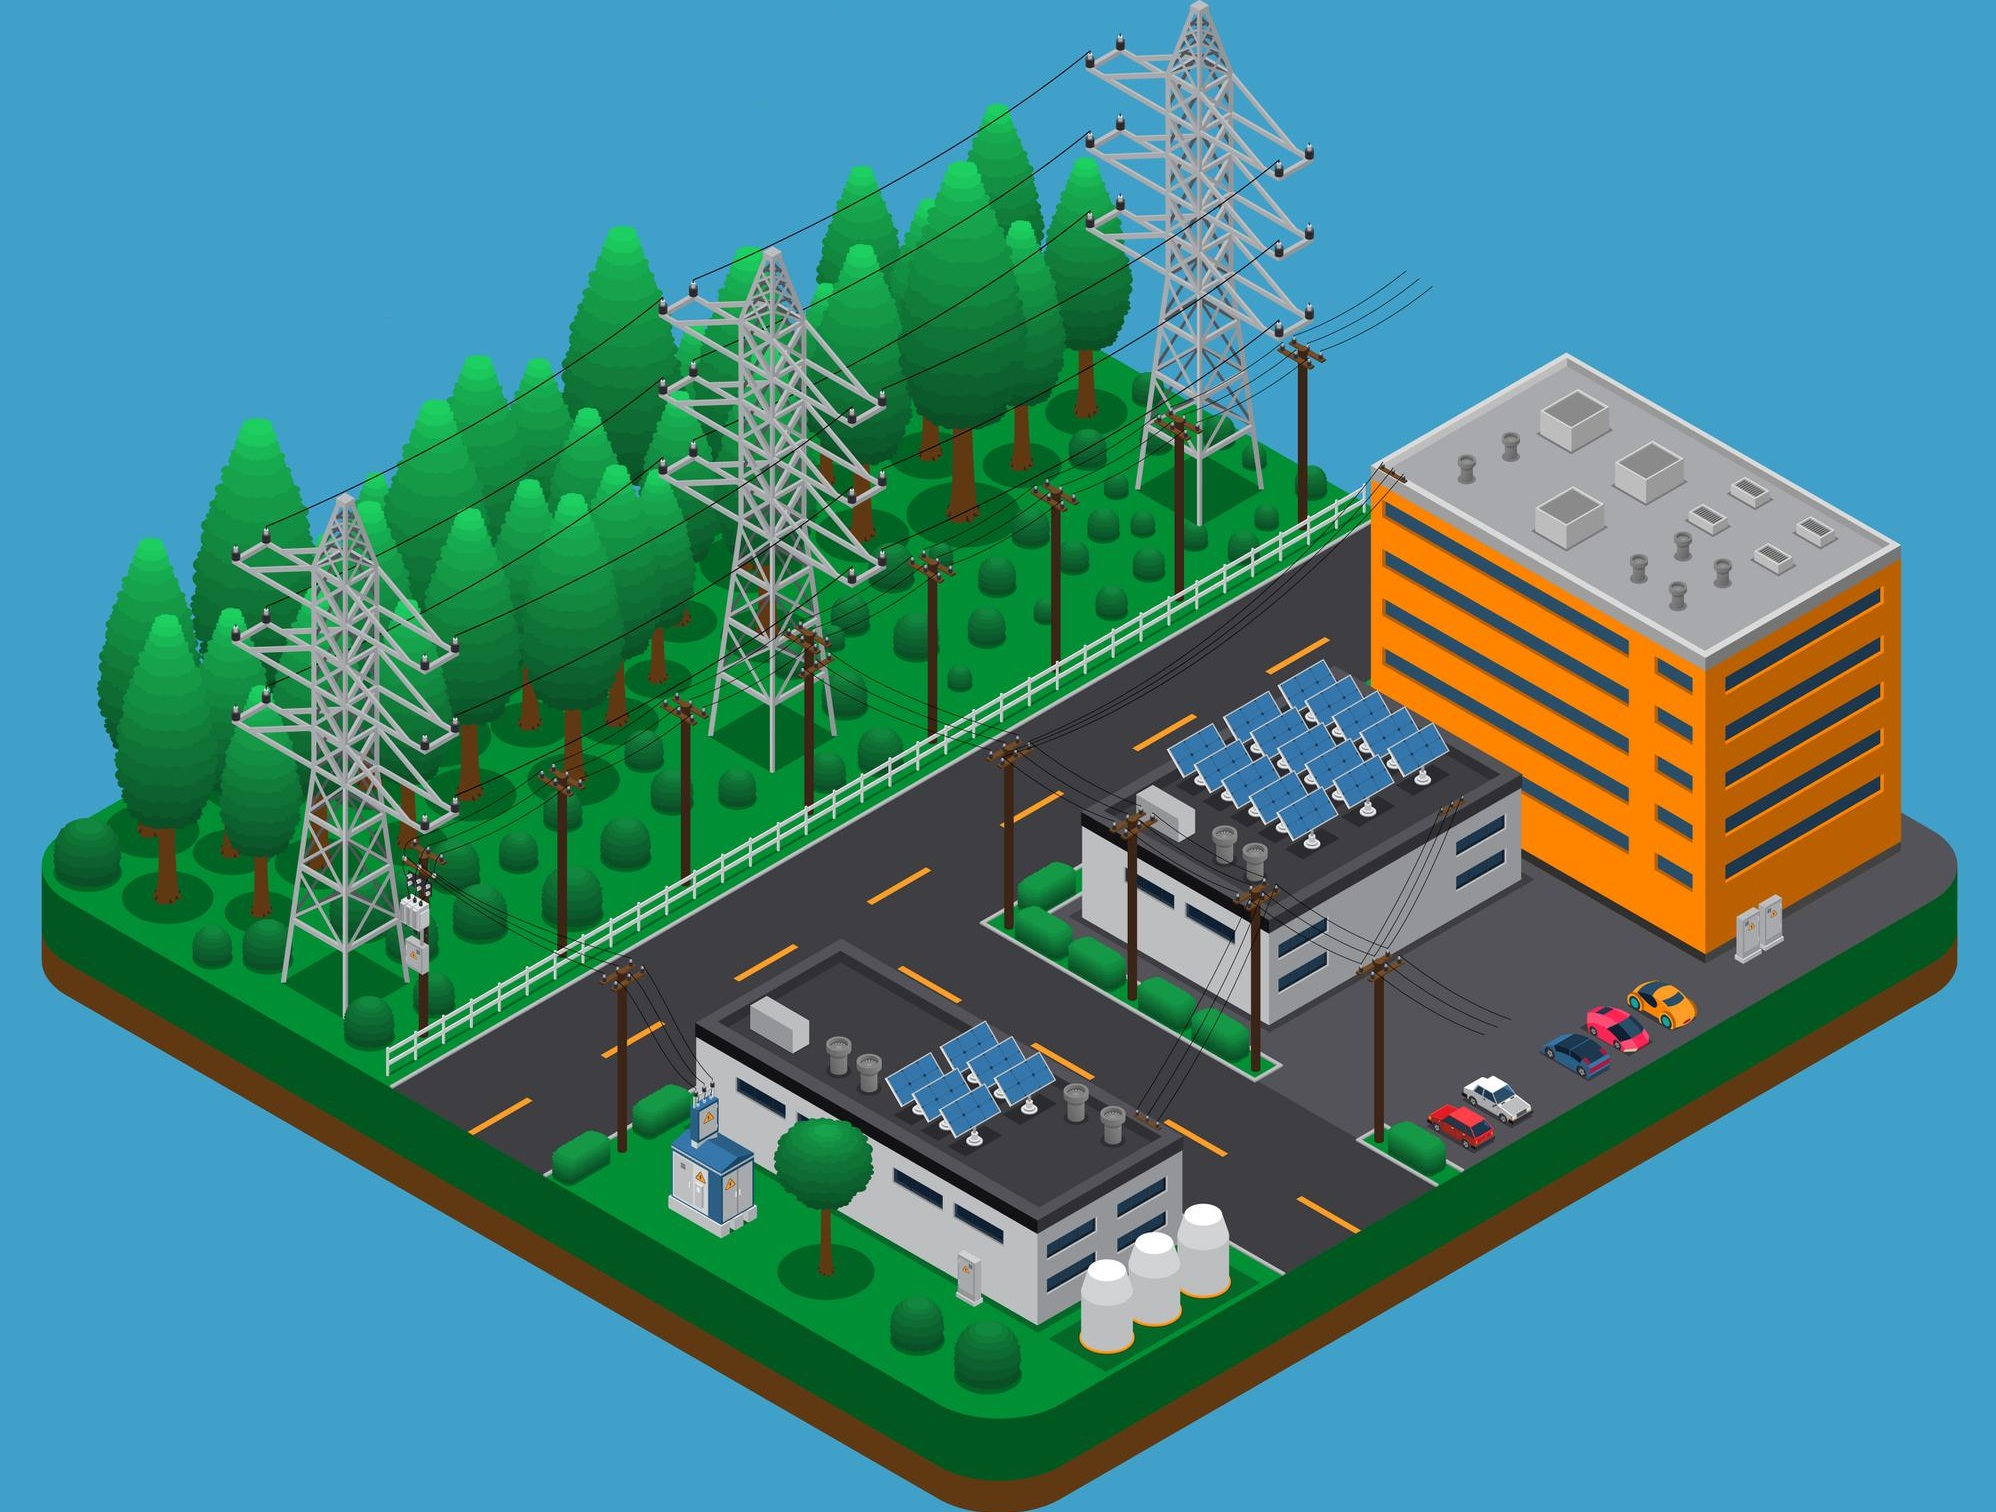

## Conhecendo o dataset disponível para o trabalho

### Importando as bibliotecas que serão utilizadas no estudo

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Começando a explorar e interpretar o dataset

In [4]:
dataFrame = pd.read_csv("per-capita-energy-use.csv")

In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               8961 non-null   object 
 1   Code                                 8796 non-null   object 
 2   Year                                 8961 non-null   int64  
 3   Energy consumption per capita (kWh)  8961 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 280.2+ KB


In [6]:
dataFrame.head()

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [7]:
dataFrame["Entity"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Europe', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 'French Guiana', 

In [8]:
dataFrame["Entity"].unique().size

215

In [9]:
dataFrame["Year"].value_counts()

2015    215
2012    215
2016    215
2013    215
2014    215
2010    214
2008    214
2007    214
2011    214
2009    214
2006    214
2005    213
2004    213
2003    213
1997    212
1998    212
2002    212
2000    212
2001    212
1999    212
1994    211
1995    211
1996    211
1993    210
1992    210
1991    203
1990    203
1986    199
1987    199
1989    199
1988    199
1985    198
1984    189
1982    189
1980    189
1983    189
1981    189
2019     83
2018     83
2017     83
1971     70
1977     70
1975     70
1978     70
1973     70
1979     70
1976     70
1974     70
1972     70
1965     69
1967     69
1970     69
1966     69
1969     69
1968     69
Name: Year, dtype: int64

### Conclusões

O dataset traz informações a respeito do consumo per capita de energia (medido em kWh) em diversos países. Para cada país abordado, está atrelado também o ano que a medição do consumo foi feita e a sigla do país em questão. Na tabela, os anos abordados variam entre 1968 a 2015, porém esse intervalo não é igual para todos os países. Por exemplo, apenas 69 países possuem a medição do consumo determinada na tabela sobre o ano de 1968.

Pode-se observar também que, no total, tem-se informações sobre 215 países diferentes. Entretanto, a sigla nominal de alguns países apresentados não está presente. 

Para o comparativo entre Brasil, Estados Unidos e China, o dataset pode ser utilizado normalmente, pois, para esses países, tem-se todas as informações desejadas.

## Análise e manipulação dos dados necessários para o comparativo

### Traduzindo as colunas para pt-br

In [10]:
dataFrame.head()

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [11]:
dataFrame.rename(columns={"Entity":"Pais", "Code":"Codigo", "Year":"Ano", "Energy consumption per capita (kWh)":"Consumo de energia per capita (kWh)"}, inplace=True)

In [12]:
dataFrame.head()

,Pais,Codigo,Ano,Consumo de energia per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


### Criando uma nova tabela atualizada de acordo com as necessidades do estudo

In [13]:
dfFiltrado = dataFrame[(dataFrame["Pais"] == "Brazil") | (dataFrame["Pais"] == "China") | (dataFrame["Pais"] == "United States")]
dfFiltrado.reset_index(inplace=True)

In [14]:
dfFiltrado.head()

,index,Pais,Codigo,Ano,Consumo de energia per capita (kWh)
0,1048,Brazil,BRA,1965,3229.990923
1,1049,Brazil,BRA,1966,3428.116543
2,1050,Brazil,BRA,1967,3457.089586
3,1051,Brazil,BRA,1968,3850.237261
4,1052,Brazil,BRA,1969,4096.666329


### Retirando as colunas que não serão utilizadas

In [15]:
dfFiltrado.drop(columns=["index", "Codigo"], inplace=True)

C:\Users\vinip\Anaconda3\envs\DataScience\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
dfFiltrado.head()

,Pais,Ano,Consumo de energia per capita (kWh)
0,Brazil,1965,3229.990923
1,Brazil,1966,3428.116543
2,Brazil,1967,3457.089586
3,Brazil,1968,3850.237261
4,Brazil,1969,4096.666329


### Traduzindo os nomes dos países para o pt-br

#### Criando função responsável pela tradução

In [17]:
def tradutor(nomePais):
    if nomePais == "Brazil":
        return "Brasil"
    elif nomePais == "United States":
        return "Estados Unidos"
    elif nomePais=="China":
        return "China"

#### Aplicando a função criada na coluna 'Pais' 

In [18]:
dfFiltrado["Pais"] = dfFiltrado["Pais"].apply(tradutor)

<ipython-input-18-04b7a0e1d2a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltrado["Pais"] = dfFiltrado["Pais"].apply(tradutor)


### Verificando se a nova tabela está de acordo com o desejado

In [19]:
dfFiltrado["Pais"].unique()

array(['Brasil', 'China', 'Estados Unidos'], dtype=object)

In [20]:
dfFiltrado["Ano"].value_counts()

1965    3
2006    3
1995    3
1996    3
1997    3
1998    3
1999    3
2000    3
2001    3
2002    3
2003    3
2004    3
2005    3
2007    3
1993    3
2008    3
2009    3
2010    3
2011    3
2012    3
2013    3
2014    3
2015    3
2016    3
2017    3
2018    3
1994    3
1992    3
1966    3
1978    3
1967    3
1968    3
1969    3
1970    3
1971    3
1972    3
1973    3
1974    3
1975    3
1976    3
1977    3
1979    3
1991    3
1980    3
1981    3
1982    3
1983    3
1984    3
1985    3
1986    3
1987    3
1988    3
1989    3
1990    3
2019    3
Name: Ano, dtype: int64

In [21]:
dfFiltrado["Ano"].min()

1965

## Salvando o novo dataset

In [22]:
dfFiltrado.to_csv("consumo_Brasil_China_EstadosUnidos.csv")

## Criando a visualização dos dados

### Criando gráfico de análise comparativa sobre crescimento do consumo de energia per capita nos países estudados

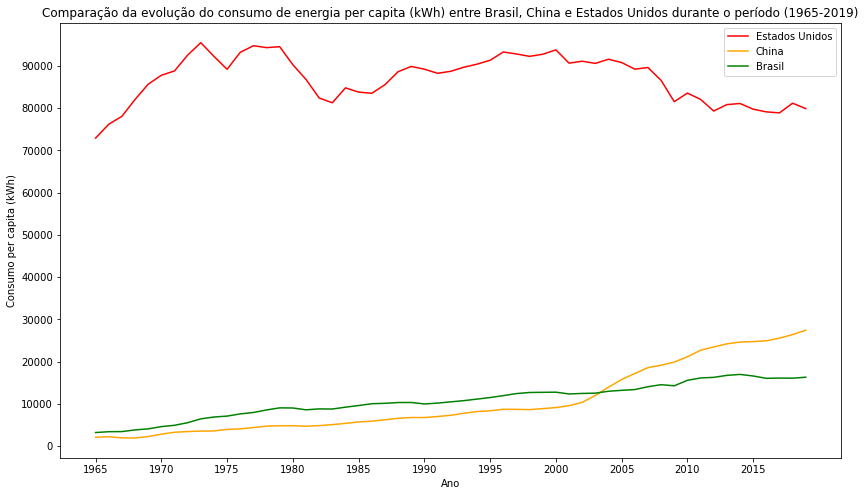

In [24]:
plt.figure(figsize=(14,8))
plt.plot(dfFiltrado[dfFiltrado["Pais"] == "Estados Unidos"]["Ano"], dfFiltrado[dfFiltrado["Pais"] == "Estados Unidos"]["Consumo de energia per capita (kWh)"], color="red", label="Estados Unidos")
plt.plot(dfFiltrado[dfFiltrado["Pais"] == "China"]["Ano"], dfFiltrado[dfFiltrado["Pais"] == "China"]["Consumo de energia per capita (kWh)"], color="orange", label="China")
plt.plot(dfFiltrado[dfFiltrado["Pais"] == "Brasil"]["Ano"], dfFiltrado[dfFiltrado["Pais"] == "Brasil"]["Consumo de energia per capita (kWh)"], color="green", label="Brasil")
plt.xticks(range(1965, 2020, 5))
plt.yticks(range(0, 100000, 10000))
plt.xlabel("Ano")
plt.ylabel("Consumo per capita (kWh)")
plt.title("Comparação da evolução do consumo de energia per capita (kWh) entre Brasil, China e Estados Unidos durante o período (1965-2019)")
plt.legend()
plt.savefig("Comparativo Evolução")

### Criando gráfico de análise comparativa do consumo de energia per capita nos países estudados durante o período 2010-2019

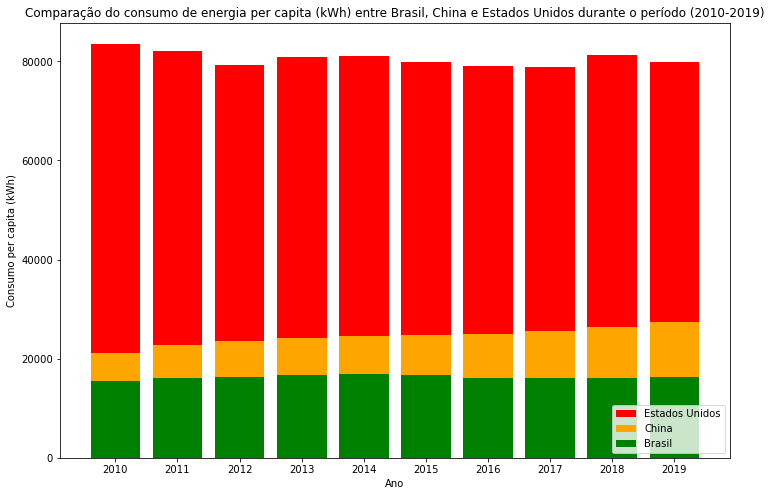

In [25]:
plt.figure(figsize=(12, 8))
plt.bar(dfFiltrado[(dfFiltrado["Pais"] == "Estados Unidos") & (dfFiltrado["Ano"] >= 2010)]["Ano"], dfFiltrado[(dfFiltrado["Pais"] == "Estados Unidos") & (dfFiltrado["Ano"] >= 2010)]["Consumo de energia per capita (kWh)"], color="red", label="Estados Unidos")
plt.bar(dfFiltrado[(dfFiltrado["Pais"] == "China") & (dfFiltrado["Ano"] >= 2010)]["Ano"], dfFiltrado[(dfFiltrado["Pais"] == "China") & (dfFiltrado["Ano"] >= 2010)]["Consumo de energia per capita (kWh)"], color="orange", label="China")
plt.bar(dfFiltrado[(dfFiltrado["Pais"] == "Brasil") & (dfFiltrado["Ano"] >= 2010)]["Ano"], dfFiltrado[(dfFiltrado["Pais"] == "Brasil") & (dfFiltrado["Ano"] >= 2010)]["Consumo de energia per capita (kWh)"], color="green", label="Brasil")
plt.xticks(range(2010, 2020, 1))
plt.yticks(range(0, 100000, 20000))
plt.xlabel("Ano")
plt.ylabel("Consumo per capita (kWh)")
plt.title("Comparação do consumo de energia per capita (kWh) entre Brasil, China e Estados Unidos durante o período (2010-2019)")
plt.legend(loc=4)
plt.savefig("Comparativo Consumo")